In [ ]:
#Functional model(2 predictions)
from keras.layers import Input,Dense
from keras.models import Model
from keras.utils import plot_model

In [ ]:
inputs = Input(shape=(8,))
l1 = Dense(8,activation='relu')(inputs)
l2 = Dense(10,activation='relu')(l1)
output_1 = Dense(1,activation='sigmoid',name='output_1')(l2) #sigmoid for binary classification
output_2 = Dense(1,activation='linear',name='output_2')(l2) #linear regression

In [ ]:
model =Model(inputs=inputs,outputs=[output_1,output_2])

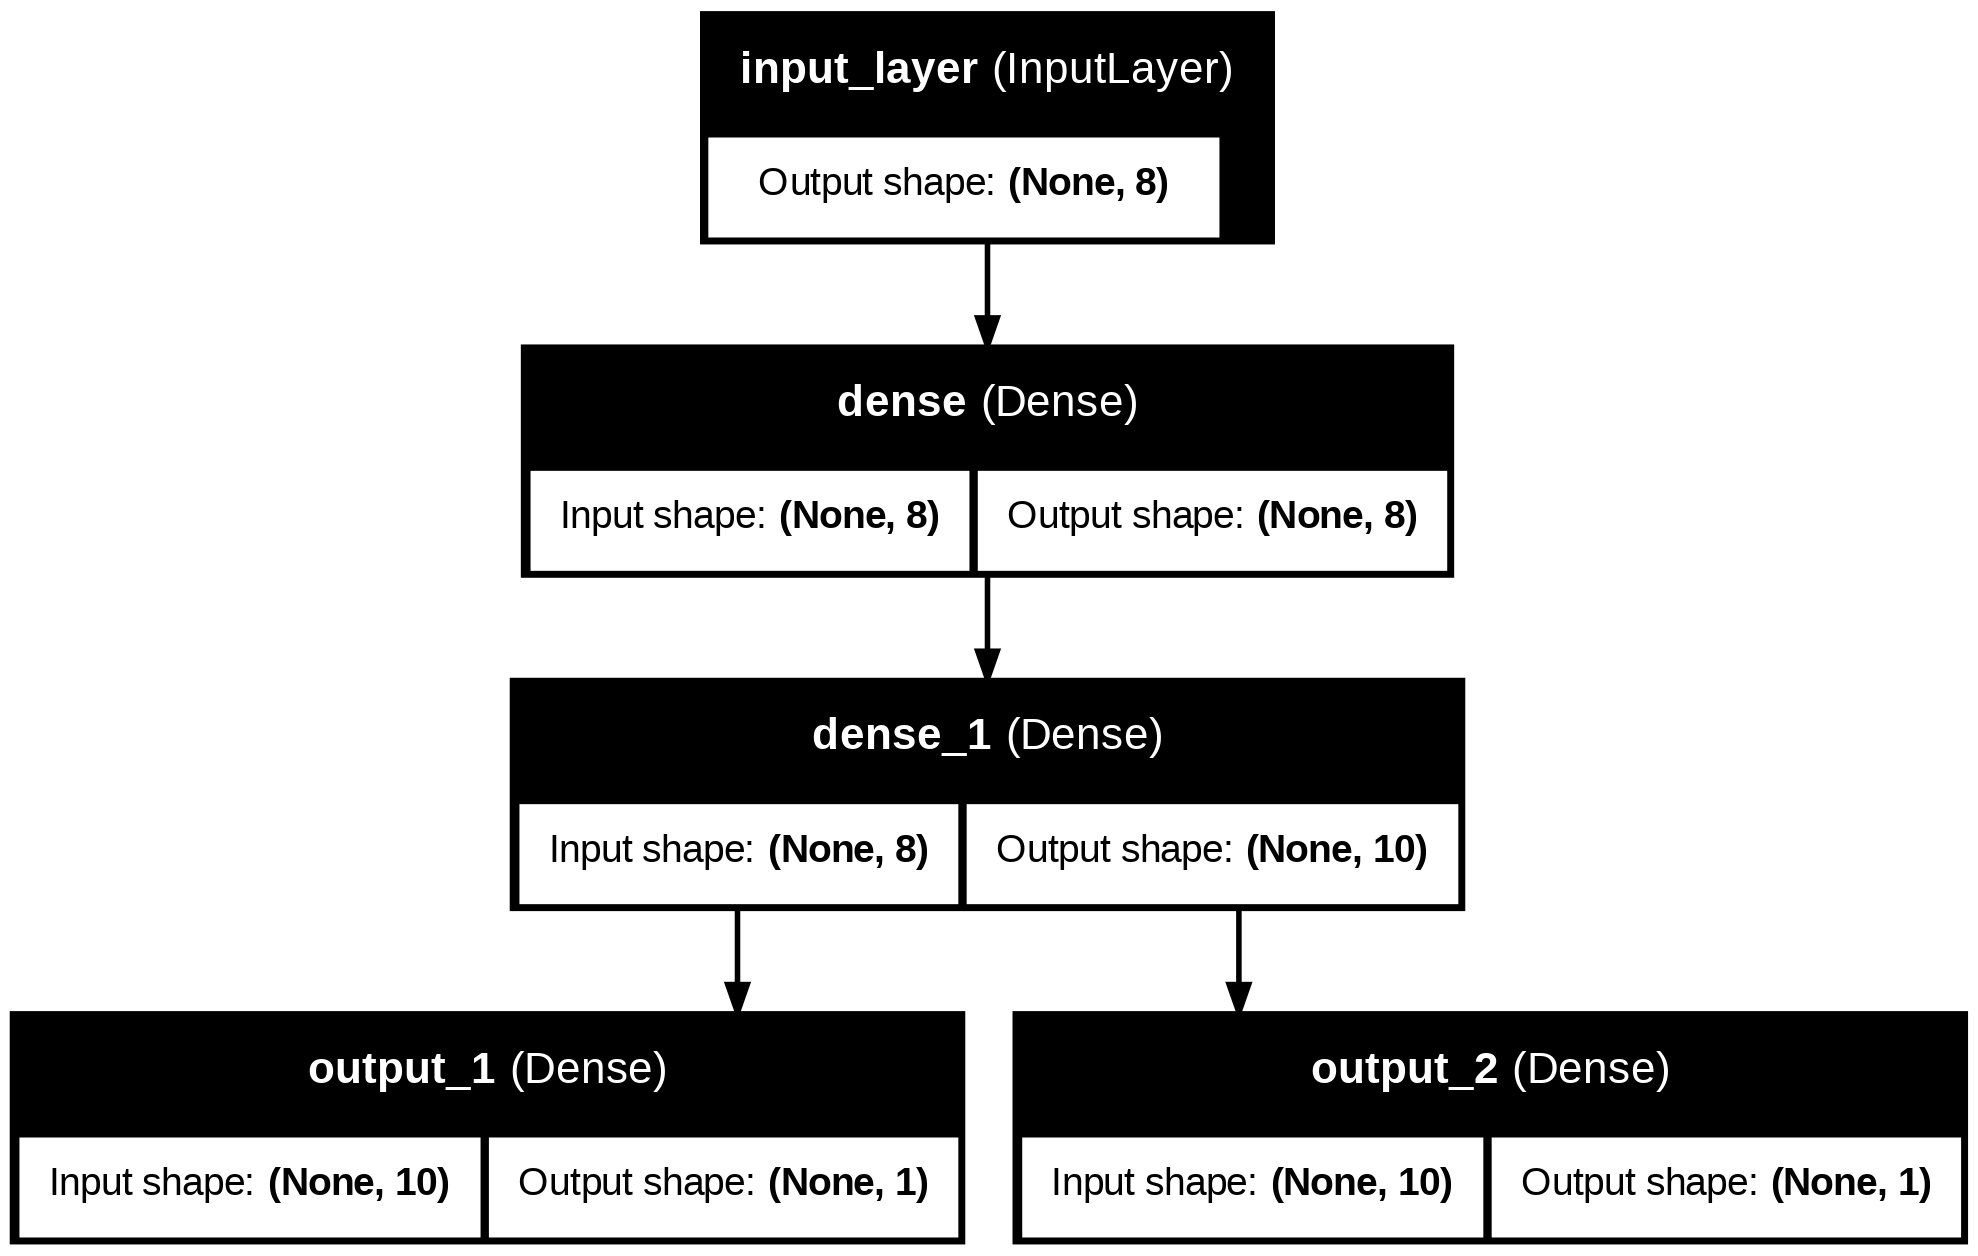

In [ ]:
plot_model(model,to_file='model_plot.png',show_shapes=True,show_layer_names=True)

In [ ]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#prediction 1 is outcome
#prediction 2 is BMI

In [ ]:
X = df.drop(columns=['Outcome','BMI'])

In [ ]:
y_classification = df['Outcome']
y_regression = df['BMI']

In [ ]:
inputs = Input(shape=(7,))
l1 = Dense(8,activation='relu')(inputs)
l2 = Dense(10,activation='relu')(l1)
l3 = Dense(10,activation='relu')(l2)
output_1 = Dense(1,activation='sigmoid',name='output_1')(l3) #sigmoid for binary classification
output_2 = Dense(1,activation='linear',name='output_2')(l3) #linear regression

In [ ]:
model = Model(inputs=inputs,outputs=[output_1,output_2])

In [ ]:
model.compile(optimizer='adam',loss={'output_1':'binary_crossentropy','output_2':'mse'},metrics={'output_1':'accuracy','output_2':'mae'})

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 7)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 8)              │             64 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 10)             │             90 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 10)             │            110 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output_1 (Dense)          │ (None, 1)              │             11 │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output_2 (Dense)          │ (None, 1)              │             11 │ dense_4[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 286 (1.12 KB)

 Trainable params: 286 (1.12 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_class_train,y_class_test,y_reg_train,y_reg_test = train_test_split(X,y_classification,y_regression,test_size=0.2,random_state=42)

In [ ]:
model.fit(X_train,{'output_1':y_class_train,'output_2':y_reg_train},batch_size=12,epochs=5)

Epoch 1/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1196.4830 - output_1_accuracy: 0.6301 - output_2_mae: 33.4798
Epoch 2/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 541.7814 - output_1_accuracy: 0.6410 - output_2_mae: 21.8697
Epoch 3/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 150.7878 - output_1_accuracy: 0.5678 - output_2_mae: 10.0474
Epoch 4/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 91.8894 - output_1_accuracy: 0.5828 - output_2_mae: 7.4970
Epoch 5/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 83.9685 - output_1_accuracy: 0.5305 - output_2_mae: 7.0581


In [ ]:
predictions = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [ ]:
(predictions[0] >0.5).astype(int)

array([[1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
    

In [ ]:
regressions = predictions[1]
regressions

array([[26.648874],
       [27.555988],
       [23.74685 ],
       [24.98178 ],
       [30.872013],
       [30.158281],
       [22.500246],
       [22.371895],
       [42.21541 ],
       [32.229927],
       [27.74064 ],
       [41.70269 ],
       [31.954561],
       [29.3825  ],
       [22.397118],
       [32.68575 ],
       [22.296028],
       [28.026466],
       [35.243267],
       [38.165936],
       [23.902878],
       [29.46211 ],
       [29.4152  ],
       [29.499426],
       [39.44257 ],
       [42.216217],
       [26.396711],
       [26.364609],
       [34.875484],
       [28.740297],
       [43.719147],
       [31.917404],
       [46.045017],
       [31.714933],
       [25.292925],
       [43.40665 ],
       [48.809334],
       [27.216831],
       [29.494003],
       [24.967552],
       [24.759394],
       [28.39302 ],
       [26.994568],
       [24.671637],
       [22.489414],
       [40.96782 ],
       [32.169613],
       [24.662525],
       [25.661047],
       [43.226017],


In [ ]:
results = pd.DataFrame({'actualclasses':y_class_test,'predictedclasses':(predictions[0] >0.5).astype(int).flatten(),'actual_regression':y_reg_test,'predicted_regression':regressions.flatten()})

In [ ]:
results

,actualclasses,predictedclasses,actual_regression,predicted_regression
668,0,1,34.0,26.648874
324,0,0,35.7,27.555988
624,0,0,30.8,23.746849
690,0,0,24.6,24.981779
473,0,0,29.9,30.872013
...,...,...,...,...
355,1,0,30.4,36.451347
534,0,0,33.3,24.400902
344,0,0,36.8,22.483616
296,1,1,28.0,32.136139
